In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# eda for covid-19 tweets
---
carson dahlberg
1. download the text files of ids
  1. https://github.com/echen102/COVID-19-TweetIDs
1. process the tokens
  1. https://github.com/DocNow/twarc
1. explore trends
1. where on earth (location) https://web.archive.org/web/20180102203025/https://developer.yahoo.com/geo/geoplanet/

## data
---
Emily Chen, Kristina Lerman, and Emilio Ferrara. 2020. #COVID-19: The First Public Coronavirus Twitter Dataset. arXiv:cs.SI/2003.07372, 2020
* 50 million tweets from the inception until March 16, 2020, constituting roughly 450 GB of raw data.
* By continuously monitoring Twitter’s trending topics, keywords and sources associated with COVID-19, we did our best to capture conversations related to the coronavirus outbreak
* tracked keywords, account names and various languages

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import pickle

# stopwords 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# for visualizing text
import scattertext as st

/home/carson/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from twarc import Twarc

In [4]:
creds = Path("../ucsd_msds/python_for_ds/Week-8-NLP-Databases")

#march_cov_files = !ls ../COVID-19-TweetIDs/2020-03
data = Path("../COVID-19-TweetIDs/2020-03")

In [5]:
def display_all(df):
    with pd.option_context('display.max_rows', None, 
                           'display.max_columns', None, 
                           'display.width', None, 
                           'display.max_colwidth', -1):
        display(df)

In [6]:
# load creds
#if not os.path.exists(creds/'secret_twitter_credentials.pkl'):
if not creds/'secret_twitter_credentials.pkl':
    # this only needs to be done once
    # then DELETE the credentials
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open(creds/'secret_twitter_credentials.pkl','rb'))

In [7]:
#[f for f in list(data.iterdir()) if "2020-03-31"][-5:]

### how big is this data?

In [44]:
sz_list = []
for f in [f for f in list(data.iterdir()) if "2020-03-31"]:
    sz = !wc -l {f}
    sz_list.append(sz.nlstr.strip().replace('  ',' ').split(' '))

In [52]:
file_sz = pd.DataFrame(sz_list,columns=['lines','file'])
file_sz['date'] = file_sz['file'].apply(lambda x: x.split('/')[-1].replace('coronavirus-tweet-id-','').replace('.txt',''))
file_sz['lines'] = file_sz['lines'].astype('int')
display_all(file_sz.head())
file_sz.info()

,lines,file,date
0,150126,../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-00.txt,2020-03-01-00
1,138592,../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-01.txt,2020-03-01-01
2,132778,../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-02.txt,2020-03-01-02
3,144540,../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-03.txt,2020-03-01-03
4,124251,../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-04.txt,2020-03-01-04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lines   744 non-null    int64 
 1   file    744 non-null    object
 2   date    744 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.6+ KB


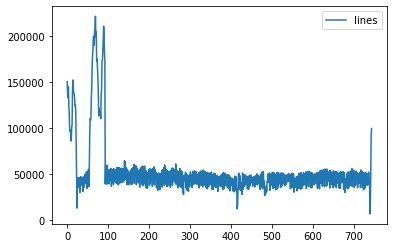

In [51]:
# plot
file_sz[['date','lines']].plot(kind='line')

In [ ]:
# try to hydrate the text
for tweet in t.hydrate(open('../COVID-19-TweetIDs/2020-03/coronavirus-tweet-id-2020-03-01-00.txt')):
    print(tweet["text"])